In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [577]:
df = pd.read_csv("../DATA/cancer_classification.csv")

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [579]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [580]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


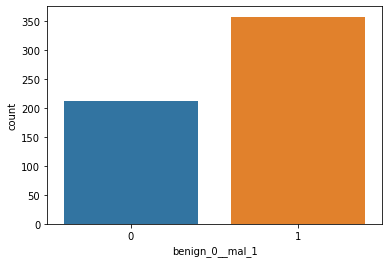

In [581]:
sns.countplot(x="benign_0__mal_1", data=df)

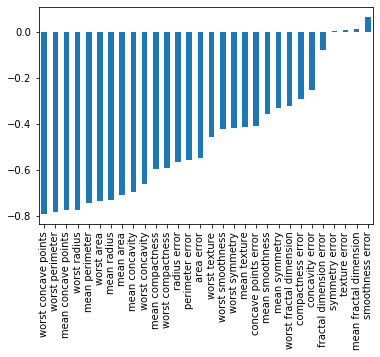

In [582]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar")

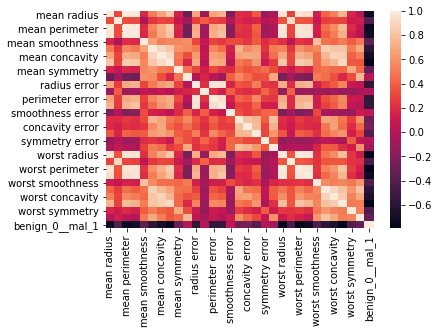

In [583]:
sns.heatmap(df.corr() )

In [584]:
X = df.drop("benign_0__mal_1", axis = 1)

In [585]:
y = df["benign_0__mal_1"]

In [586]:
from sklearn.model_selection import train_test_split

In [587]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 101 )

In [588]:
from sklearn.preprocessing import MinMaxScaler

In [589]:
scaler = MinMaxScaler()

In [590]:
X_train = scaler.fit_transform(X_train)

In [591]:
X_test = scaler.transform(X_test)

In [592]:
from tensorflow.keras.models import Sequential

In [593]:
from tensorflow.keras.layers import Dense, Dropout

In [594]:
X_train.shape

(426, 30)

In [595]:
model = Sequential()

In [99]:
model.add(Dense(30,activation = "relu"))
model.add(Dense(15,activation = "relu"))

#Binary Classification
model.add(Dense(1,activation = "sigmoid"))
model.compile(loss= "binary_crossentropy", optimizer = "adam")

In [100]:
model.fit(x = X_train, y=y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6932 - val_loss: 0.6640
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6502 - val_loss: 0.6329
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6180 - val_loss: 0.6005
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5845 - val_loss: 0.5641
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5468 - val_loss: 0.5226
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5052 - val_loss: 0.4799
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4627 - val_loss: 0.4351
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4222 - val_loss: 0.3922
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3809 - val_loss: 0.3531
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3468 - val_loss: 0.3152
Epoch 11/

In [101]:
losses =pd.DataFrame(model.history.history)

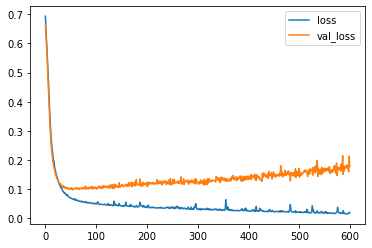

In [102]:
losses.plot()

In [158]:
model.add(Dense(30,activation = "relu"))
model.add(Dense(15,activation = "relu"))

#Binary Classification
model.add(Dense(1,activation = "sigmoid"))
model.compile(loss= "binary_crossentropy", optimizer = "adam")

In [190]:
from tensorflow.keras.callbacks import EarlyStopping

In [160]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [161]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1,patience =10)

In [162]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6972 - val_loss: 0.6738
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6683 - val_loss: 0.6549
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6446 - val_loss: 0.6299
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5977
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5800 - val_loss: 0.5582
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5385 - val_loss: 0.5109
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4923 - val_loss: 0.4614
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4448 - val_loss: 0.4120
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3954 - val_loss: 0.3625
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3500 - val_loss: 0.3158
Epoch 11/

In [163]:
model_loss = pd.DataFrame(model.history.history)

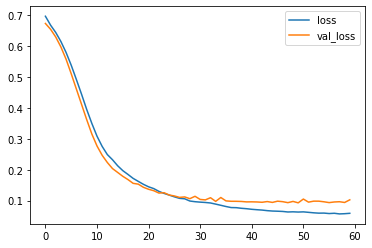

In [165]:
model_loss.plot()

In [596]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [597]:
model.add(Dense(30,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(15,activation = "relu"))
model.add(Dropout(0.5))
#Binary Classification
model.add(Dense(1,activation = "sigmoid"))
model.compile(loss= "binary_crossentropy", optimizer = "adam")

In [598]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1,patience =23)

In [599]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7030 - val_loss: 0.6712
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6743 - val_loss: 0.6482
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6449 - val_loss: 0.6258
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6291 - val_loss: 0.6042
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6113 - val_loss: 0.5768
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5931 - val_loss: 0.5379
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5497 - val_loss: 0.5043
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5067 - val_loss: 0.4645
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4978 - val_loss: 0.4231
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4680 - val_loss: 0.3910
Epoch 11/

In [600]:
model_loss = pd.DataFrame(model.history.history)

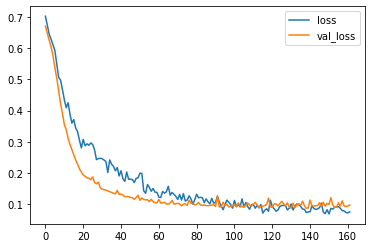

In [601]:
model_loss.plot()

In [602]:
predictions = model.predict_classes(X_test)

In [603]:
from sklearn.metrics import classification_report, confusion_matrix

In [604]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[54  1]
 [ 2 86]]
